# Тестовое задание
Написать и обучить модель-автокодировщик на датасете на выбор: CIFAR10, CIFAR100.
Обучить модель-классификатор на латентных представлениях обученного автокодировщика.


### Рекомендуемые шаги для выполнения задания

**Шаг 1.** Подготовка инфраструктуры.

Создание окружения, организация структуры репозитория, загрузка датасетов.

**Шаг 2.** Реализовать модель-автоенкодер.

Выбрать архитектуру и реализовать ее совместно с процедурой обучения, подходящей для выбранного датасета.
Важно обратить внимание на выбор размерность скрытого состояния. Обосновать свой выбор.

**Шаг 3.** Обучить автоенкодер.

Нужно обучить реализованную архитектуру на скаченном датасете.
Оценить качество работы модели.

**Шаг 4.** Реализовать модель-классификатор.

Реализовать небольшую модель классификатор на скрытых представлениях уже обученного автоенкодера.
Реализовать пайплайн обучения данной модели.

**Шаг 5.** Обучение модели классификатора и визуализация результатов.

На этом шаге требуется обучить модель классификатор и оценить ее качество.
Подумайте, в каком виде было бы удобно провести демонстрацию результатов?

**Шаг 6.** Выводы и идеи.

Проведите анализ результатов, сделайте несколько выводов на основе полученных рузультатов.
Предложите свои идеи, как можно улучшить текущие результаты.


### Что будет оцениваться?
1. Реализация и оформление кода на github.
2. Соответствие решения тестовому заданию.
3. Оформление результатов.
4. Любые релевантные мысли, идеи и соображения.
5. Будет плюсом проведение нескольких экспериментов и их анализ.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import copy
import os

import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

from src.models import SimpleClassifier, Autoencoder
from src.train_test import train, test, wrapper
from src.utils import prepare_data, prepare_clf_data, DATASET_DIR, PATH_TO_SAVE_MODELS, imshow

In [3]:
if not os.path.exists(DATASET_DIR):
    os.makedirs(DATASET_DIR)
    
if not os.path.exists(PATH_TO_SAVE_MODELS):
    os.makedirs(PATH_TO_SAVE_MODELS)

# Шаг 1. Подготовка инфраструктуры
Создаем окружение

`conda create -n "enc_env" python=3.8.12`

`conda activate enc_env`

Клонируем репозиторий

`git clone https://github.com/dkorzh10/autoencoder.git`

Переходим в директорию

`cd autoencoder`

Устанваливаем зависимости

`pip install -r requirements.txt`

`pip intall -e .`

Открываем ноутбук `notebooks/report.ipynb` и работаем.

Веса автоенкодера и классификатора можно взять [здесь](https://drive.google.com/drive/folders/1Aog9sotmvZZvCADtVF2DebCsz2ZE1QU3?usp=drive_link)

# Шаги 2-3. Автоэнкодер
Размерность скрытого пространства хочется брать меньше, чем число параметров изображения (3 * 32 * 32) в надежде на то, что размерности будет достаточно для хорошего приближения.

Попробуем взять `128, 256, 512`.

Также играет роль параметры сети, зафиксируем число каналов после первой свертки равным `64`.

In [4]:
train_set, val_set, test_set, train_loader, val_loader, test_loader = prepare_data()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
params = {"epochs": 30, "device": "cuda:0", "lr": 1e-3, "loss_type": "mse"}
total_dict = wrapper(train_loader, val_loader, [128, 256, 512], [64], params)

  3%|████▌                                                                                                                                     | 1/30 [00:06<03:19,  6.89s/it]

0.0005639213116632567 0.0003500297486782074


  7%|█████████▏                                                                                                                                | 2/30 [00:11<02:31,  5.40s/it]

0.00028932280068596204 0.00025143891200423243


 10%|█████████████▊                                                                                                                            | 3/30 [00:15<02:13,  4.96s/it]

0.00020129576780729823 0.000191819915920496


 13%|██████████████████▍                                                                                                                       | 4/30 [00:20<02:02,  4.72s/it]

0.0001687327365908358 0.00016362128853797912


 17%|███████████████████████                                                                                                                   | 5/30 [00:24<01:55,  4.64s/it]

0.00015446186429924434 0.00015597600042819976


 20%|███████████████████████████▌                                                                                                              | 6/30 [00:28<01:48,  4.52s/it]

0.00014337533364693324 0.0001406933918595314


 23%|████████████████████████████████▏                                                                                                         | 7/30 [00:33<01:42,  4.44s/it]

0.000135342653385467 0.00013377425149083138


 27%|████████████████████████████████████▊                                                                                                     | 8/30 [00:37<01:36,  4.40s/it]

0.00012430454128318363 0.00012421112209558486


 30%|█████████████████████████████████████████▍                                                                                                | 9/30 [00:41<01:32,  4.41s/it]

0.00011904534147017532 0.0001226742446422577


 33%|█████████████████████████████████████████████▋                                                                                           | 10/30 [00:46<01:28,  4.45s/it]

0.00011321833187507259 0.00011323056407272815


 37%|██████████████████████████████████████████████████▏                                                                                      | 11/30 [00:50<01:23,  4.40s/it]

0.0001094890132960346 0.00010807331539690494


 40%|██████████████████████████████████████████████████████▊                                                                                  | 12/30 [00:54<01:18,  4.36s/it]

0.0001040472720646196 0.0001150334145873785


 43%|███████████████████████████████████████████████████████████▎                                                                             | 13/30 [00:59<01:14,  4.37s/it]

0.00010022915510667695 9.914397001266479e-05


 47%|███████████████████████████████████████████████████████████████▉                                                                         | 14/30 [01:03<01:09,  4.36s/it]

9.488728621767627e-05 9.493179991841317e-05


 50%|████████████████████████████████████████████████████████████████████▌                                                                    | 15/30 [01:07<01:04,  4.32s/it]

9.151128071049849e-05 9.247725456953048e-05


 53%|█████████████████████████████████████████████████████████████████████████                                                                | 16/30 [01:12<01:00,  4.32s/it]

9.015422239899636e-05 8.914249688386917e-05


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                           | 17/30 [01:16<00:55,  4.30s/it]

8.561035328441195e-05 8.970153704285622e-05


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                      | 18/30 [01:20<00:51,  4.28s/it]

8.34596645914846e-05 8.543218933045864e-05


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                  | 19/30 [01:25<00:47,  4.31s/it]

8.255557256440322e-05 8.270790092647076e-05


 67%|███████████████████████████████████████████████████████████████████████████████████████████▎                                             | 20/30 [01:29<00:43,  4.31s/it]

7.97306509481536e-05 8.106817007064819e-05


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 21/30 [01:33<00:39,  4.36s/it]

7.866362527840668e-05 8.056990057229995e-05


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 22/30 [01:38<00:34,  4.34s/it]

7.713192560606532e-05 7.997975163161754e-05


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 23/30 [01:42<00:30,  4.31s/it]

7.639610614213679e-05 7.735391072928905e-05


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 24/30 [01:46<00:25,  4.32s/it]

7.474101591441366e-05 7.796288169920445e-05


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 25/30 [01:51<00:21,  4.33s/it]

7.463672976526949e-05 7.58706022053957e-05


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 26/30 [01:55<00:17,  4.34s/it]

7.286149093674288e-05 7.644152641296387e-05


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 27/30 [01:59<00:13,  4.34s/it]

7.275918962226974e-05 7.625314518809319e-05


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 28/30 [02:04<00:08,  4.36s/it]

7.18556488553683e-05 7.411010339856148e-05


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 29/30 [02:08<00:04,  4.36s/it]

7.140325071911017e-05 7.362379021942616e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:12<00:00,  4.43s/it]


7.091959619687663e-05 7.895211279392242e-05


  3%|████▌                                                                                                                                     | 1/30 [00:04<02:05,  4.32s/it]

0.0005264782321121957 0.00032216863483190537


  7%|█████████▏                                                                                                                                | 2/30 [00:08<02:01,  4.35s/it]

0.0002613919753995207 0.00020510031133890152


 10%|█████████████▊                                                                                                                            | 3/30 [00:12<01:56,  4.31s/it]

0.00018332102398077647 0.0001696054846048355


 13%|██████████████████▍                                                                                                                       | 4/30 [00:17<01:52,  4.33s/it]

0.00015981429202689064 0.00017664835974574088


 17%|███████████████████████                                                                                                                   | 5/30 [00:21<01:48,  4.34s/it]

0.0001465613873468505 0.00014317209646105765


 20%|███████████████████████████▌                                                                                                              | 6/30 [00:26<01:44,  4.34s/it]

0.00013267818060186173 0.0001272262517362833


 23%|████████████████████████████████▏                                                                                                         | 7/30 [00:30<01:39,  4.35s/it]

0.00011906052451166842 0.00011592889353632927


 27%|████████████████████████████████████▊                                                                                                     | 8/30 [00:34<01:36,  4.38s/it]

0.00011029306203126907 0.0001100338451564312


 30%|█████████████████████████████████████████▍                                                                                                | 9/30 [00:39<01:32,  4.39s/it]

0.00010243017313381036 0.00010100561454892158


 33%|█████████████████████████████████████████████▋                                                                                           | 10/30 [00:43<01:28,  4.42s/it]

9.68493881324927e-05 9.80521198362112e-05


 37%|██████████████████████████████████████████████████▏                                                                                      | 11/30 [00:48<01:23,  4.38s/it]

9.194681379530164e-05 9.011522158980369e-05


 40%|██████████████████████████████████████████████████████▊                                                                                  | 12/30 [00:52<01:18,  4.37s/it]

8.654236325787174e-05 8.621975816786289e-05


 43%|███████████████████████████████████████████████████████████▎                                                                             | 13/30 [00:56<01:14,  4.36s/it]

8.357030645840698e-05 8.27172078192234e-05


 47%|███████████████████████████████████████████████████████████████▉                                                                         | 14/30 [01:01<01:09,  4.36s/it]

7.870934046804905e-05 7.92345516383648e-05


 50%|████████████████████████████████████████████████████████████████████▌                                                                    | 15/30 [01:05<01:05,  4.35s/it]

7.607175699538655e-05 8.289878442883492e-05


 53%|█████████████████████████████████████████████████████████████████████████                                                                | 16/30 [01:09<01:01,  4.37s/it]

7.29058093080918e-05 8.026959672570228e-05


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                           | 17/30 [01:14<00:56,  4.38s/it]

7.087322229312526e-05 7.551934793591499e-05


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                      | 18/30 [01:18<00:52,  4.36s/it]

6.856740315755208e-05 6.90871175378561e-05


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                  | 19/30 [01:22<00:48,  4.38s/it]

6.693950523104933e-05 6.705958805978298e-05


 67%|███████████████████████████████████████████████████████████████████████████████████████████▎                                             | 20/30 [01:27<00:43,  4.38s/it]

6.498733216689693e-05 6.620652191340923e-05


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 21/30 [01:31<00:39,  4.40s/it]

6.43202020890183e-05 6.716490052640438e-05


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 22/30 [01:36<00:35,  4.39s/it]

6.164028094046646e-05 6.233207508921623e-05


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 23/30 [01:40<00:30,  4.39s/it]

6.141313157147831e-05 6.518733017146588e-05


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 24/30 [01:44<00:26,  4.38s/it]

5.9458525085614785e-05 6.392852254211903e-05


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 25/30 [01:49<00:21,  4.38s/it]

5.801651895874076e-05 6.748368293046952e-05


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 26/30 [01:53<00:17,  4.37s/it]

5.6951449397537444e-05 5.906037706881762e-05


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 27/30 [01:57<00:13,  4.37s/it]

5.6061830764843356e-05 5.589654501527548e-05


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 28/30 [02:02<00:08,  4.36s/it]

5.475020617660549e-05 6.234977878630161e-05


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 29/30 [02:06<00:04,  4.39s/it]

5.3265006985101434e-05 5.523661375045776e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:11<00:00,  4.37s/it]


5.184141865207089e-05 5.331671852618456e-05


  3%|████▌                                                                                                                                     | 1/30 [00:04<02:14,  4.62s/it]

0.0005514428438411819 0.00033033901304006574


  7%|█████████▏                                                                                                                                | 2/30 [00:09<02:08,  4.61s/it]

0.00027097137115067904 0.00021886515244841576


 10%|█████████████▊                                                                                                                            | 3/30 [00:13<02:06,  4.67s/it]

0.00018086935670839417 0.00016760958656668662


 13%|██████████████████▍                                                                                                                       | 4/30 [00:18<02:00,  4.65s/it]

0.0001581383142206404 0.00014952435046434401


 17%|███████████████████████                                                                                                                   | 5/30 [00:23<01:57,  4.68s/it]

0.00013964855546752612 0.00013775995075702668


 20%|███████████████████████████▌                                                                                                              | 6/30 [00:28<01:52,  4.70s/it]

0.00012701121634907194 0.00012427957206964492


 23%|████████████████████████████████▏                                                                                                         | 7/30 [00:32<01:48,  4.72s/it]

0.00011498857152958712 0.00011198918521404266


 27%|████████████████████████████████████▊                                                                                                     | 8/30 [00:37<01:43,  4.70s/it]

0.00010573743490709198 0.00010266463160514831


 30%|█████████████████████████████████████████▍                                                                                                | 9/30 [00:42<01:39,  4.72s/it]

9.819140806794167e-05 0.00010964573919773102


 33%|█████████████████████████████████████████████▋                                                                                           | 10/30 [00:46<01:34,  4.72s/it]

9.120985178483857e-05 9.03779536485672e-05


 37%|██████████████████████████████████████████████████▏                                                                                      | 11/30 [00:51<01:29,  4.73s/it]

8.501580266488922e-05 8.732588440179825e-05


 40%|██████████████████████████████████████████████████████▊                                                                                  | 12/30 [00:56<01:24,  4.71s/it]

8.149197966688209e-05 8.436572887003422e-05


 43%|███████████████████████████████████████████████████████████▎                                                                             | 13/30 [01:01<01:20,  4.72s/it]

7.833344418969419e-05 7.860995940864086e-05


 47%|███████████████████████████████████████████████████████████████▉                                                                         | 14/30 [01:05<01:15,  4.70s/it]

7.438996666007571e-05 7.467013001441956e-05


 50%|████████████████████████████████████████████████████████████████████▌                                                                    | 15/30 [01:10<01:10,  4.67s/it]

7.070924925307433e-05 7.21975963562727e-05


 53%|█████████████████████████████████████████████████████████████████████████                                                                | 16/30 [01:15<01:05,  4.66s/it]

6.781437351471847e-05 9.428448379039764e-05


 57%|█████████████████████████████████████████████████████████████████████████████▋                                                           | 17/30 [01:19<01:00,  4.67s/it]

6.621174801968866e-05 6.818024404346943e-05


 60%|██████████████████████████████████████████████████████████████████████████████████▏                                                      | 18/30 [01:24<00:56,  4.68s/it]

6.36583995901876e-05 6.690115965902805e-05


 63%|██████████████████████████████████████████████████████████████████████████████████████▊                                                  | 19/30 [01:29<00:51,  4.70s/it]

6.234326995909215e-05 6.725777499377728e-05


 67%|███████████████████████████████████████████████████████████████████████████████████████████▎                                             | 20/30 [01:33<00:46,  4.69s/it]

6.0306407366361884e-05 6.148770097643138e-05


 70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 21/30 [01:38<00:42,  4.72s/it]

5.859080126716031e-05 6.186950318515301e-05


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 22/30 [01:43<00:37,  4.73s/it]

5.792446620762348e-05 5.775656308978796e-05


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 23/30 [01:48<00:33,  4.72s/it]

5.560523757918013e-05 5.846655853092671e-05


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 24/30 [01:52<00:28,  4.74s/it]

5.2996974024507736e-05 5.4559768363833426e-05


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 25/30 [01:57<00:23,  4.80s/it]

5.1291266145805516e-05 5.209680665284395e-05


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 26/30 [02:02<00:19,  4.78s/it]

5.0143486965033744e-05 4.903809148818254e-05


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 27/30 [02:07<00:14,  4.75s/it]

4.870561350964837e-05 4.908377043902874e-05


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 28/30 [02:12<00:09,  4.77s/it]

4.700195064975156e-05 4.715823642909527e-05


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 29/30 [02:16<00:04,  4.77s/it]

4.6324243603481183e-05 4.952176008373499e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [02:21<00:00,  4.72s/it]

4.444452238579591e-05 4.425283093005419e-05


In [6]:
criterion = nn.MSELoss(reduction="mean")
device = params["device"]
loss_type = params["loss_type"]
zs = list(total_dict[64].keys())
test_losses = []
for z in zs:
    m = total_dict[64][z]["model"].eval()
    test_loss = test(test_loader, m, device, criterion, loss_type)
    test_losses.append(test_loss)
    
    

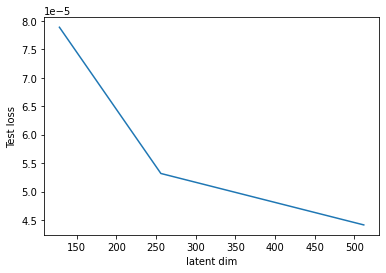

In [7]:
plt.plot(zs, test_losses)
plt.xlabel("latent dim")
plt.ylabel("Test loss")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


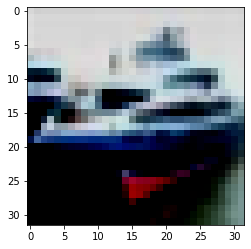

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


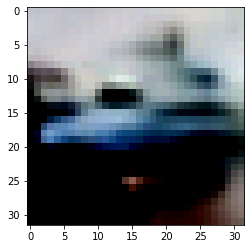

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


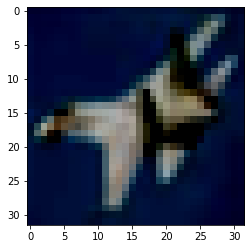

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


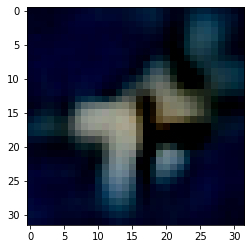

In [8]:
m = total_dict[64][128]["model"].eval()
i, l = next(iter(test_loader))
ii = m(i.to(device))
imshow(i[1])
imshow(ii[1].detach().cpu())

imshow(i[10])
imshow(ii[10].detach().cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


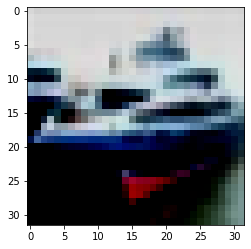

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


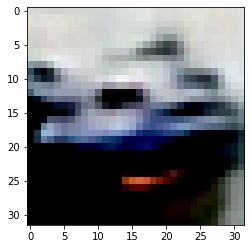

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


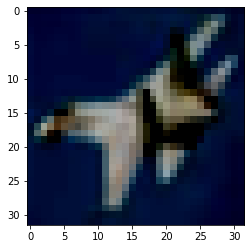

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


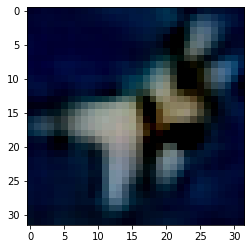

In [9]:
m = total_dict[64][256]["model"].eval()
ii = m(i.to(device))
imshow(i[1])
imshow(ii[1].detach().cpu())

imshow(i[10])
imshow(ii[10].detach().cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


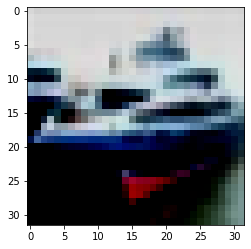

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


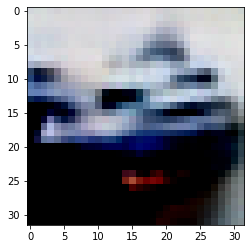

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


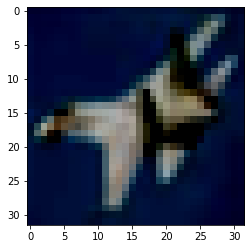

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


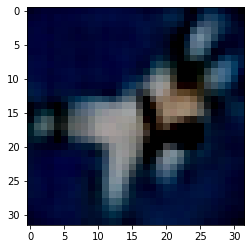

In [10]:
m = total_dict[64][512]["model"].eval()
ii = m(i.to(device))
imshow(i[1])
imshow(ii[1].detach().cpu())

imshow(i[10])
imshow(ii[10].detach().cpu())

256 и 512 довольно неплохо декодируют изображения, 128 - заметно хуже. Поэтому выберем 256 в качестве размерности внутреннего пространства

# Шаги 4-5. Классификатор

In [11]:
# m = total_dict[64][256]["model"].eval()
m = Autoencoder(64, 256)
name = os.path.join(PATH_TO_SAVE_MODELS, "loss_type_mse_c_hid_64_latent_dim_256_best_model.pth")
m.load_state_dict(torch.load(name))
m = m.to(device)
m.eval()
2 + 2


4

In [12]:
enc = copy.deepcopy(m.encoder).to("cpu")
enc.eval()
2

2

In [13]:
m.encoder.net[0].weight[0]

tensor([[[-0.0958,  0.1096, -0.0553],
         [-0.0172, -0.0868,  0.1247],
         [-0.0123, -0.0041, -0.1261]],

        [[ 0.1043,  0.1010, -0.1486],
         [-0.0843,  0.0872, -0.0769],
         [-0.0515, -0.1420,  0.1556]],

        [[-0.0659, -0.0166,  0.0168],
         [ 0.0586,  0.1391,  0.1638],
         [ 0.1609,  0.0295, -0.1414]]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [14]:
enc.net[0].weight[0]

tensor([[[-0.0958,  0.1096, -0.0553],
         [-0.0172, -0.0868,  0.1247],
         [-0.0123, -0.0041, -0.1261]],

        [[ 0.1043,  0.1010, -0.1486],
         [-0.0843,  0.0872, -0.0769],
         [-0.0515, -0.1420,  0.1556]],

        [[-0.0659, -0.0166,  0.0168],
         [ 0.0586,  0.1391,  0.1638],
         [ 0.1609,  0.0295, -0.1414]]], grad_fn=<SelectBackward0>)

Веса совпадают, хорошо

In [15]:
train_set_encoded, val_set_encoded, test_set_encoded, \
train_loader_encoded, val_loader_encoded, test_loader_encoded \
= prepare_clf_data(train_set, val_set, test_set, enc, batch_size=256, num_workers=4)


In [16]:
clf = SimpleClassifier(256)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, min_lr=1e-6)

In [18]:
clf, res = train(
    train_loader_encoded,
    val_loader_encoded, clf, device, criterion,
    optimizer, scheduler, epochs=5, loss_type="ce",
    c_hid=64, latent_dim=256
    )

 20%|███████████████████████████▊                                                                                                               | 1/5 [00:28<01:52, 28.25s/it]

Val/Test accuracy: 0.467
0.006365863943099976 0.467
Train accuracy: 0.40755555555555556


 40%|███████████████████████████████████████████████████████▌                                                                                   | 2/5 [00:56<01:25, 28.37s/it]

Val/Test accuracy: 0.4958
0.0056241157213846845 0.4958
Train accuracy: 0.4776888888888889


 60%|███████████████████████████████████████████████████████████████████████████████████▍                                                       | 3/5 [01:24<00:56, 28.29s/it]

Val/Test accuracy: 0.5232
0.005270607595973545 0.5232
Train accuracy: 0.5097111111111111


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 4/5 [01:52<00:28, 28.20s/it]

Val/Test accuracy: 0.5294
0.0050428852955500285 0.5294
Train accuracy: 0.5314222222222222


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:21<00:00, 28.24s/it]

Val/Test accuracy: 0.5466
0.0048708288007312354 0.5466
Train accuracy: 0.5494666666666667


In [19]:
clf = SimpleClassifier(256)
name = os.path.join(PATH_TO_SAVE_MODELS, "loss_type_ce_c_hid_64_latent_dim_256_best_model.pth")
clf.load_state_dict(torch.load(name))
clf = clf.to(device)
m.eval()
2

2

In [20]:
test_acc = test(test_loader_encoded, clf, device, criterion, loss_type="ce")

Val/Test accuracy: 0.5442


In [21]:
print(test_acc)

0.5442


# Шаг 6. Выводы
- Картинки автоенкодера удовлетоврительны, похожи на оригаинальные при выборе не сильно маленькой размерности латентного пространства
- Результаты классификации получились не очень, но явно лучше рандома
- Можно попробовать решейпить в размер какртинки 16 на 16 и использовать свертки
- Для их улучшения попробовал добавлять при обучение автоэнкодера AM-Softmax loss, чтобы эмбединги разных классов разсредоточиить в разных местах пространства, но автоэнкодер стал работоть плохо

# Ссылки
- https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial9/AE_CIFAR10.html